<a href="https://colab.research.google.com/github/shkabh/PUS2024_SKaur/blob/main/11_14_24_NN101_MNISTprediction_PUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
y_train.shape

(60000,)

In [4]:
x_train.shape

(60000, 28, 28)

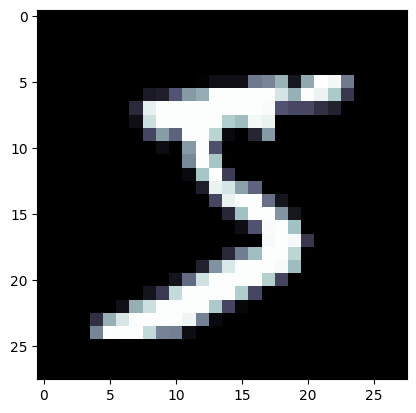

In [5]:
plt.imshow(x_train[0], cmap = 'bone')

In [7]:
# check how many values are in the target variable
# your code goes here
np.unique(y_train, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [8]:
# check what is the min and max value and data type of the features dataset
# your code goes here
np.min(x_train), np.max(x_train), x_train.dtype

(0, 255, dtype('uint8'))

In [9]:
testvar = np.array([255]).astype(np.uint8)

In [10]:
testvar + np.uint8(1)

array([0], dtype=uint8)

In [11]:
# scale the imput data so that it is min=0 and max=1 (min-max scaling)
# your code goes here
x_train = x_train/255.
x_test = x_test/255.

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_train.dtype

dtype('float64')

In [15]:
#x_train.reshape(60_000, 784).shape

(60000, 784)

In [14]:
28*28

784

In [16]:
input_shape = x_train.shape[1:]

In [23]:
# architecture hyperparametrs
#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# add 1 dense layer with 128 neurons and relu activation function
# add 1 dropout layers dropping 20% of the connections
# add 1 dense layer with 10 neurons
# add the output  layer with 1
# your code goes here

from tensorflow.keras.layers import Dense, Dropout
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Flatten(input_shape = input_shape))
model1.add(Dense(128, activation = 'relu'))

model1.add(Dropout(0.2))

model1.add(Dense(10, activation = 'relu'))
model1.add(Dense(1, activation = 'linear'))
model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,781 (397.58 KB)

 Trainable params: 101,781 (397.58 KB)

 Non-trainable params: 0 (0.00 B)

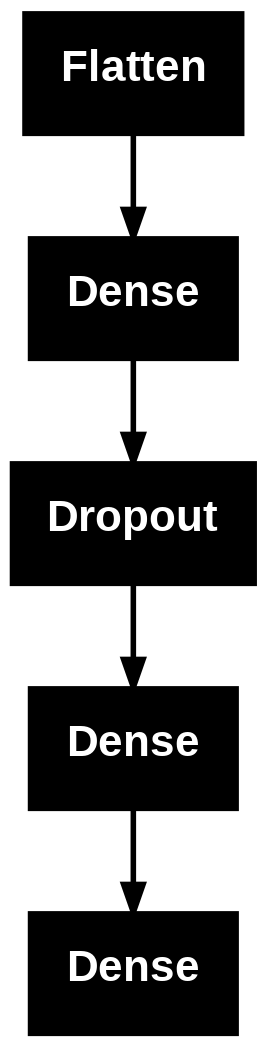

In [24]:
tf.keras.utils.plot_model(model1)

In [25]:
# training hyperparameter
# choose the MeanSquaredError and Adam as the optimizer

loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()



In [26]:
model1.compile(optimizer = optimizer, loss = loss_fn, batch_size = 32,
              metrics=['accuracy'])
training_history = model1.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1607 - loss: 3.0676
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.1942 - loss: 1.1120
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1965 - loss: 0.8596
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1984 - loss: 0.6806
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1990 - loss: 0.6130


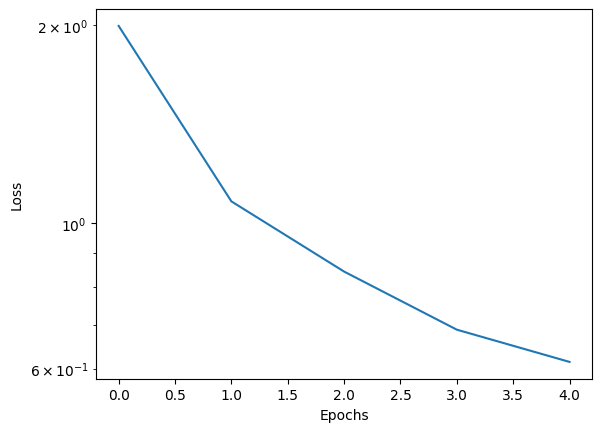

In [27]:
plt.plot(training_history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.yscale('log')


In [28]:
model1.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2021 - loss: 0.6416


[0.5532448887825012, 0.20550000667572021]

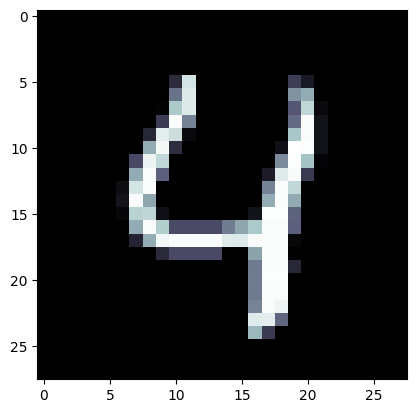

In [30]:
plt.imshow(x_test[4], cmap = 'bone')

In [31]:
model1.predict(x_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[ 6.66898   ],
       [ 1.6779735 ],
       [ 1.0086586 ],
       [-0.15888023],
       [ 3.952803  ]], dtype=float32)

In [ ]:
# is this model overfitting? how would you find out?

In [39]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [40]:
# modify the architecture hyperparametrs
# set the last layer to a 10 nerons dense layer and set the softmax as the activation function for the last layer
#prob_model = tf.keras.models.Sequential()
# add 1 dense layer with 128 neurons and relu activation function
# add 1 dropout layers dropping 20% of the connections
# add 1 dense layer with 10 neurons
# your code goes hereprob_model.summary()

model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape = input_shape))
model2.add(Dense(128, activation = 'relu'))

model2.add(Dropout(0.2))

model2.add(Dense(10, activation = 'softmax'))
model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

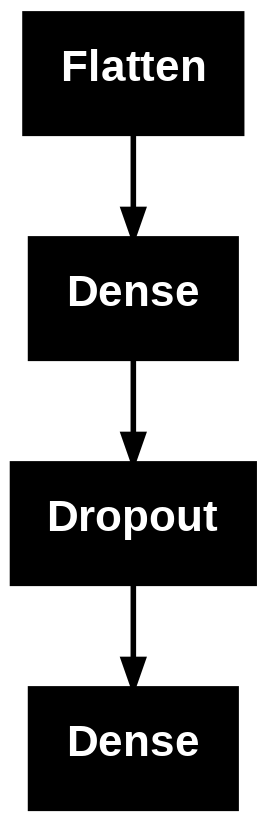

In [34]:
tf.keras.utils.plot_model(model2)

In [42]:
#set the loss to be SparseCategoricalCrossentropy(), the optimizer to Adam and compile and fit as before
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

model2.compile(optimizer = optimizer, loss = loss,
              metrics=['accuracy'])
prob_training_history = model2.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8607 - loss: 0.4809
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9535 - loss: 0.1533
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9659 - loss: 0.1129
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9738 - loss: 0.0859
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9774 - loss: 0.0707


In [43]:
model2.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9756 - loss: 0.0807


[0.0703999474644661, 0.978600025177002]

In [44]:
result = model2.predict(x_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


In [45]:
result

array([[2.37388207e-07, 6.18260110e-09, 6.98761232e-06, 1.33228707e-04,
        2.72117311e-11, 8.78835849e-08, 4.63157160e-12, 9.99848008e-01,
        9.61072146e-07, 1.05177269e-05],
       [5.53212601e-07, 2.47744814e-04, 9.99629736e-01, 7.13819391e-05,
        2.72043880e-15, 2.76480114e-05, 1.56479819e-05, 9.30193162e-12,
        7.32075569e-06, 5.79611914e-11],
       [1.11080404e-07, 9.98688996e-01, 8.68139468e-05, 1.73651060e-05,
        4.15858340e-05, 1.51326876e-05, 7.02478746e-06, 8.66168761e-04,
        2.75790488e-04, 1.07809785e-06],
       [9.99893904e-01, 6.35269615e-08, 4.87263314e-05, 2.45979237e-07,
        6.61773015e-07, 7.77943796e-07, 4.15435097e-05, 2.76378228e-06,
        9.35385671e-08, 1.09904595e-05],
       [6.50702486e-06, 1.38578378e-06, 1.70340154e-05, 5.60102137e-07,
        9.96103942e-01, 7.42477368e-06, 3.34842298e-05, 6.54656906e-04,
        4.88956084e-06, 3.16997827e-03],
       [3.27248229e-09, 9.99762356e-01, 4.36290406e-07, 4.49332134e-07,
   

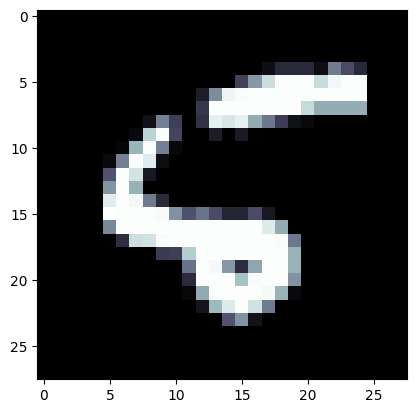

In [48]:
plt.imshow(x_test[8], cmap = 'bone')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


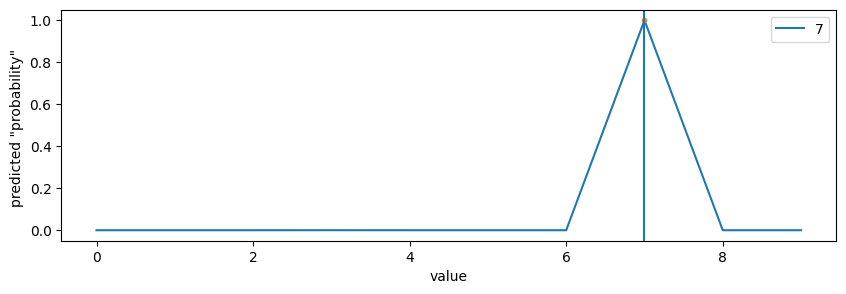

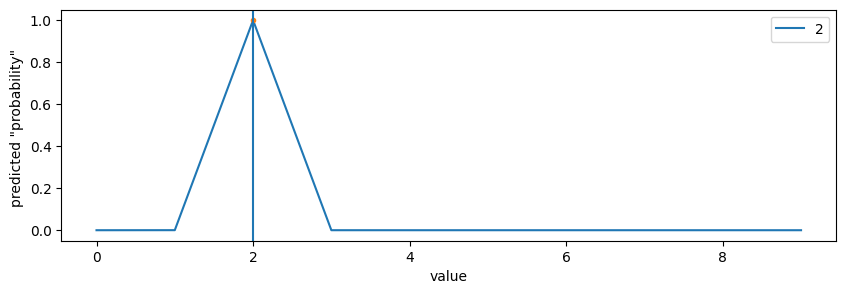

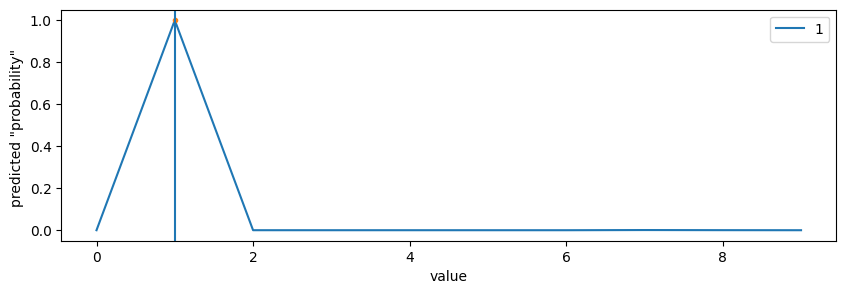

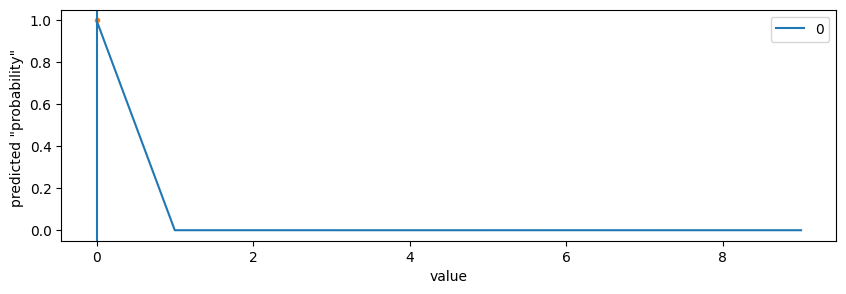

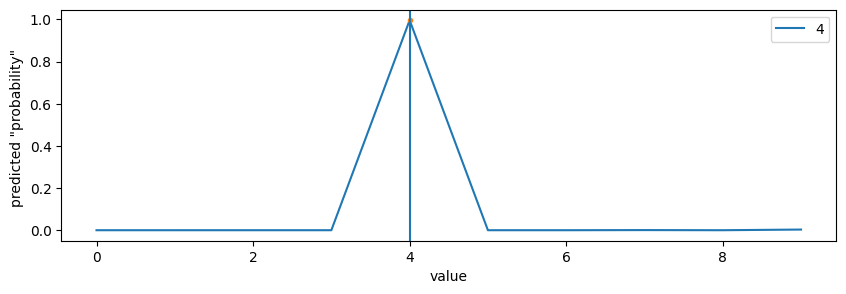

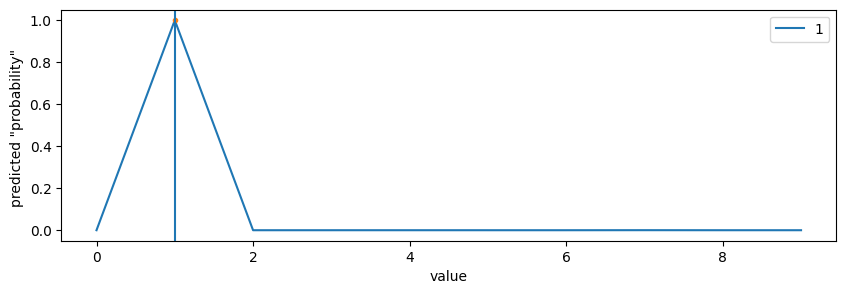

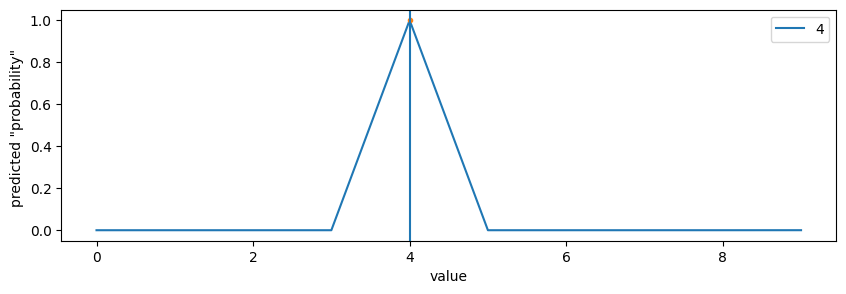

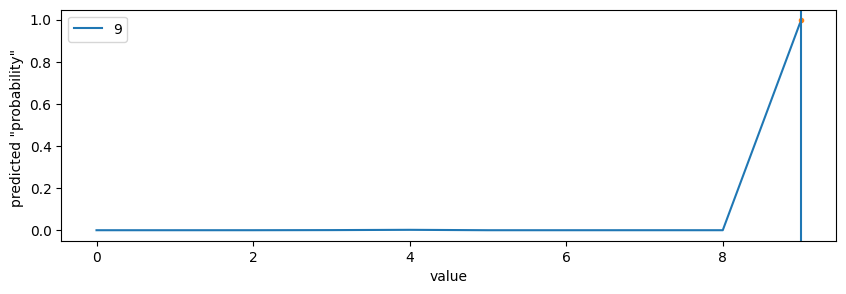

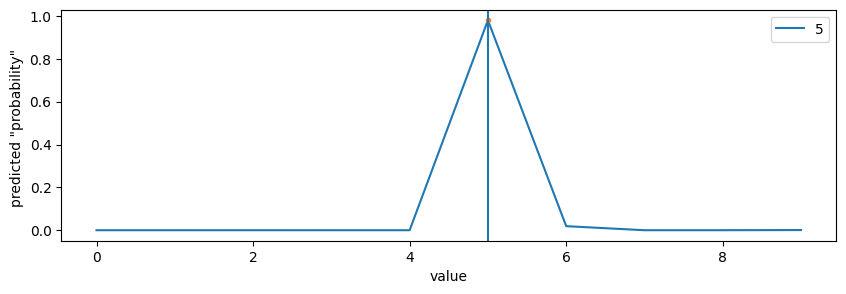

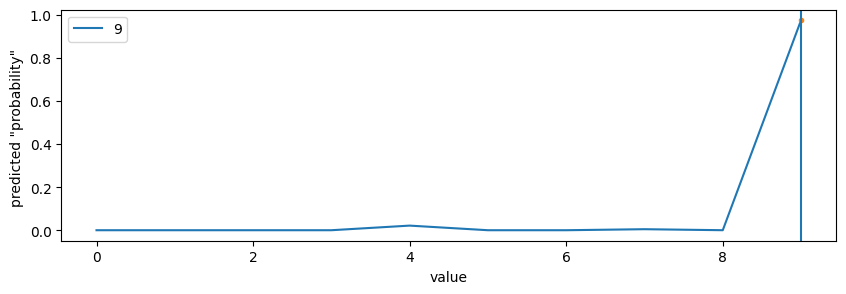

In [47]:
for i,result in enumerate(model2.predict(x_test[:10])):
  plt.figure(figsize=(10,3))
  plt.plot(range(10), result, label=y_test[i])
  plt.plot(range(10)[np.argmax(result)], np.max(result), '.')
  plt.axvline(range(10)[np.argmax(result)])
  plt.legend()
  plt.xlabel("value")
  plt.ylabel('predicted "probability" ')
  plt.show()